# Beatriz Balan Fiuza

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("DATASET_STROKES_BALANCEADO.csv",sep=";")
dataframe = dataframe.dropna()
clasificadores = ["no", "yes"]

In [3]:
dataframe.head(10)
dataframe.describe()
dataframe.groupby("Stroke").size()

Stroke
0    3245
1    3245
dtype: int64

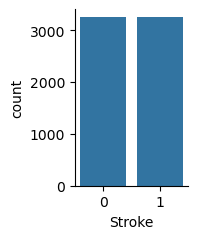

In [4]:
import seaborn as sb
sb.catplot(x = "Stroke",data=dataframe,kind="count",height=2.5, aspect=.8)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()
for column in dataframe.select_dtypes(include=['object']).columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [7]:
y = dataframe["Stroke"]
x = dataframe.drop("Stroke", axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn_mm.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
predicciones = knn_mm.predict(x_test)


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

In [14]:
print(tn, fp, fn, tp)

822 159 24 942


Text(50.722222222222214, 0.5, 'True')

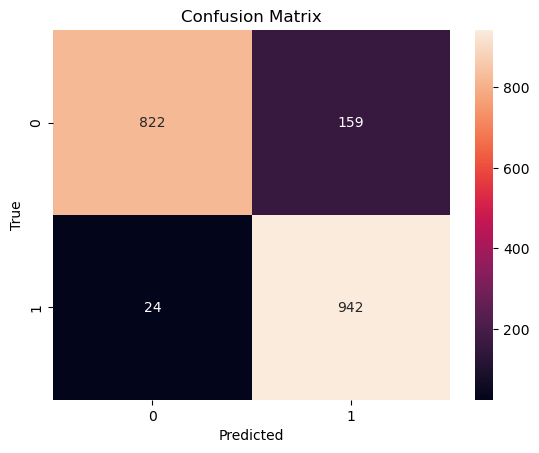

In [15]:
sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

In [99]:
print(classification_report(y_test,predicciones,target_names=clasificadores))

              precision    recall  f1-score   support

          no       0.97      0.84      0.90       981
         yes       0.86      0.98      0.91       966

    accuracy                           0.91      1947
   macro avg       0.91      0.91      0.91      1947
weighted avg       0.91      0.91      0.91      1947



In [100]:
tasa_error = []
for i in range(1,25):
    knn_mm = KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i = knn_mm.predict(x_test)
    tasa_error.append(np.mean (prediccion_i != y_test))

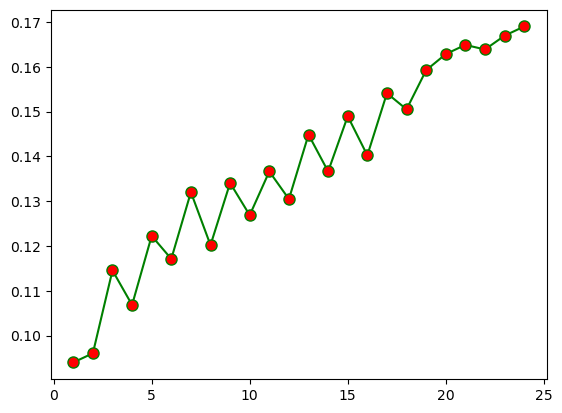

In [101]:
valores = range (1,25)
plt.plot(valores, tasa_error, color="green", marker="o", markerfacecolor = "red", markersize="8")

In [102]:
knn_mm = KNeighborsClassifier(n_neighbors=1)

In [103]:
knn_mm.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
predicciones = knn_mm.predict(x_test)

[[822 159]
 [ 24 942]]
              precision    recall  f1-score   support

          no       0.97      0.84      0.90       981
         yes       0.86      0.98      0.91       966

    accuracy                           0.91      1947
   macro avg       0.91      0.91      0.91      1947
weighted avg       0.91      0.91      0.91      1947



Text(50.722222222222214, 0.5, 'True')

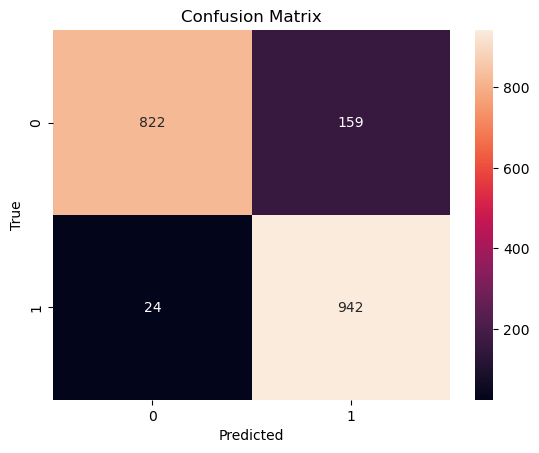

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicciones))
print(classification_report(y_test,predicciones,target_names=clasificadores))
sns.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

In [106]:
print(knn_mm.predict([[1,67,0,1,1,4,1,228.69,36.6,1]]))
print(knn_mm.predict_proba([[1,67,0,1,1,4,1,228.69,36.6,1]]))

[1]
[[0. 1.]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [107]:
print(knn_mm.predict([[0,36,0,0,1,4,1,72.16,23.2,0]]))
print(knn_mm.predict_proba([[0,36,0,0,1,4,1,72.16,23.2,0]]))

[0]
[[1. 0.]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [108]:
print(knn_mm.predict([[0,56,0,0,1,5,0,81.77,21.8,0]]))
print(knn_mm.predict_proba([[0,56,0,0,1,5,0,81.77,21.8,0]]))

[0]
[[1. 0.]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [109]:
!pip install joblib

In [110]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Entrenar el modelo con k=3
knn_mm = KNeighborsClassifier(n_neighbors=3)
knn_mm.fit(x_train, y_train)

# Guardar el modelo
joblib.dump(knn_mm, 'modelo_knn.pkl')

# Guardar los nombres de las columnas
joblib.dump(x.columns.tolist(), 'columnas_modelo.pkl')

['columnas_modelo.pkl']